# Top United States Headlines Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Open the data
df = pd.read_excel('top_headlines.xlsx')

## 1. Data Preprocessing

### Getting to Know the Data

In [3]:
# print a few rows
df.head()

,Title,Source,Author,Published At,URL
0,Stocks are little changed as investors await N...,CNBC,"Samantha Subin, Brian Evans",2024-11-20T14:30:00Z,https://www.cnbc.com/2024/11/19/stock-market-t...
1,S.T.A.L.K.E.R. 2: Heart of Chornobyl is a glor...,The Verge,Lewis Gordon,2024-11-20T14:00:00Z,https://www.theverge.com/2024/11/20/24300652/s...
2,[Removed],[Removed],NaN,2024-11-20T13:58:00Z,https://removed.com
3,'Bomb cyclone' kills 1 and knocks out power to...,Associated Press,"HALLIE GOLDEN, LISA BAUMANN",2024-11-20T13:24:00Z,https://apnews.com/article/california-oregon-w...
4,Liam Payne’s Funeral: One Direction’s Harry St...,Variety,Ellise Shafer,2024-11-20T13:22:00Z,https://variety.com/2024/music/global/liam-pay...


In [4]:
df.describe()

,Title,Source,Author,Published At,URL
count,35,35,27,35,35
unique,32,24,26,35,32
top,[Removed],[Removed],The Wall Street Journal,2024-11-20T14:30:00Z,https://removed.com
freq,4,4,2,1,4


In [5]:
# checking for duplicated rows. The output will have the word True if there are duplicated rows
duplicates = df.duplicated().unique()
print(duplicates)

[False]


### Checking for and dealing with missing values

In [6]:
df.isnull().sum()

Title           0
Source          0
Author          8
Published At    0
URL             0
dtype: int64

In [7]:
# Let's count the empty values before filling them
missing_before = df['Author'].isna().sum()
print(f"Empty before replacement: {missing_before}")

# Let's replace empty values with the word "Unknown"
df['Author'] = df['Author'].fillna('Unknown')

# Let's count the empty values after filling them
missing_after = df['Author'].isna().sum()
print(f"Empty after replacement: {missing_after}")

Empty before replacement: 8
Empty after replacement: 0


### Deleting URL's where url = 'https://removed.com'

In [8]:
# We will delete the rows where URL is "https://removed.com"
df = df[df['URL'] != 'https://removed.com']

# Checking the result
df.head()

,Title,Source,Author,Published At,URL
0,Stocks are little changed as investors await N...,CNBC,"Samantha Subin, Brian Evans",2024-11-20T14:30:00Z,https://www.cnbc.com/2024/11/19/stock-market-t...
1,S.T.A.L.K.E.R. 2: Heart of Chornobyl is a glor...,The Verge,Lewis Gordon,2024-11-20T14:00:00Z,https://www.theverge.com/2024/11/20/24300652/s...
3,'Bomb cyclone' kills 1 and knocks out power to...,Associated Press,"HALLIE GOLDEN, LISA BAUMANN",2024-11-20T13:24:00Z,https://apnews.com/article/california-oregon-w...
4,Liam Payne’s Funeral: One Direction’s Harry St...,Variety,Ellise Shafer,2024-11-20T13:22:00Z,https://variety.com/2024/music/global/liam-pay...
5,Biden administration approves sending anti-per...,CNN,"Oren Liebermann, Natasha Bertrand",2024-11-20T13:04:00Z,https://www.cnn.com/2024/11/19/politics/biden-...


### Normalizing author names

In [9]:
# Checking the names before changes
# Hallie Golden, Lisa Baumann written with capital letters
print(df['Author'].head())

0          Samantha Subin, Brian Evans
1                         Lewis Gordon
3          HALLIE GOLDEN, LISA BAUMANN
4                        Ellise Shafer
5    Oren Liebermann, Natasha Bertrand
Name: Author, dtype: object


In [10]:
# Altering the names in the Author column so that they all begin with a capital letter
df['Author'] = df['Author'].str.title()

# Verifying the changes
print(df['Author'].head())

0          Samantha Subin, Brian Evans
1                         Lewis Gordon
3          Hallie Golden, Lisa Baumann
4                        Ellise Shafer
5    Oren Liebermann, Natasha Bertrand
Name: Author, dtype: object


## 2. Basic Analysis

### Distribution of Sources

In [11]:
source_counts = df['Source'].value_counts()
print("Distribution of Sources:")
print(source_counts)

Distribution of Sources:
Source
CNN                                             3
Reuters                                         3
Associated Press                                2
The Daily Galaxy --Great Discoveries Channel    2
Yahoo Entertainment                             2
The Wall Street Journal                         2
CNBC                                            1
New York Post                                   1
Push Square                                     1
National Geographic                             1
BBC News                                        1
Gizmodo.com                                     1
MacRumors                                       1
The Denver Post                                 1
Financial Times                                 1
ESPN                                            1
The Verge                                       1
Cageside Seats                                  1
9to5google.com                                  1
Salon             

### Distribution of Publishing Days

In [12]:
# Changing the form of the dates in the Published At column to DD-MM-YYYY
df['Published At'] = pd.to_datetime(df['Published At']).dt.strftime('%d-%m-%Y')

# Grouping based on dates
date_counts = df['Published At'].value_counts()
print("Distribution of Publishing Days:")
print(date_counts)


Distribution of Publishing Days:
Published At
20-11-2024    23
19-11-2024     6
18-11-2024     2
Name: count, dtype: int64


## 3. Text Analysis

### Most common key phrases in headlines

In [13]:
# Creating a text vector from the headlines
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Title'].fillna(''))

# Summing the frequency of the terms
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_words = word_counts.sum(axis=0).sort_values(ascending=False).head(10)
print("Most common words in headlines:")
print(top_words)


Most common words in headlines:
trump        4
reuters      3
new          3
cnn          3
secretary    2
galaxy       2
game         2
ukraine      2
journal      2
post         2
dtype: int64


### Title Sentiment Analysis

In [14]:
# Adding a column for the numerical sentiment analysis result ("Sentiment")
df['Sentiment'] = df['Title'].fillna('').apply(lambda x: TextBlob(x).sentiment.polarity)

# A function to kategorize the sentiments:
# Positive sentiment = polarity is bigger than 0.1
# Negative sentiment = polarity is less than -0.1
# Other sentiments interpreted as neutral

def classify_sentiment(polarity):
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Add a colum for the categorized sentiments ("Sentiment Category")
df['Sentiment Category'] = df['Sentiment'].apply(classify_sentiment)

In [15]:
df.head()

,Title,Source,Author,Published At,URL,Sentiment,Sentiment Category
0,Stocks are little changed as investors await N...,CNBC,"Samantha Subin, Brian Evans",20-11-2024,https://www.cnbc.com/2024/11/19/stock-market-t...,-0.025568,Neutral
1,S.T.A.L.K.E.R. 2: Heart of Chornobyl is a glor...,The Verge,Lewis Gordon,20-11-2024,https://www.theverge.com/2024/11/20/24300652/s...,0.850000,Positive
3,'Bomb cyclone' kills 1 and knocks out power to...,Associated Press,"Hallie Golden, Lisa Baumann",20-11-2024,https://apnews.com/article/california-oregon-w...,-0.166667,Negative
4,Liam Payne’s Funeral: One Direction’s Harry St...,Variety,Ellise Shafer,20-11-2024,https://variety.com/2024/music/global/liam-pay...,0.000000,Neutral
5,Biden administration approves sending anti-per...,CNN,"Oren Liebermann, Natasha Bertrand",20-11-2024,https://www.cnn.com/2024/11/19/politics/biden-...,0.062500,Neutral


## 4. Data Visualization

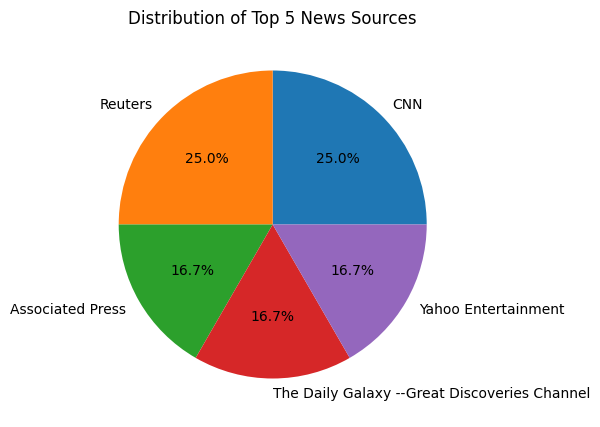

In [16]:
# Calculating the frequency of different news sources and selecting the top 5 most frequent ones
top_sources = df['Source'].value_counts().nlargest(5)

# Creating a pie chart of the top 5 news sources
top_sources.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 5))
plt.title("Distribution of Top 5 News Sources")
plt.ylabel('')
plt.show()

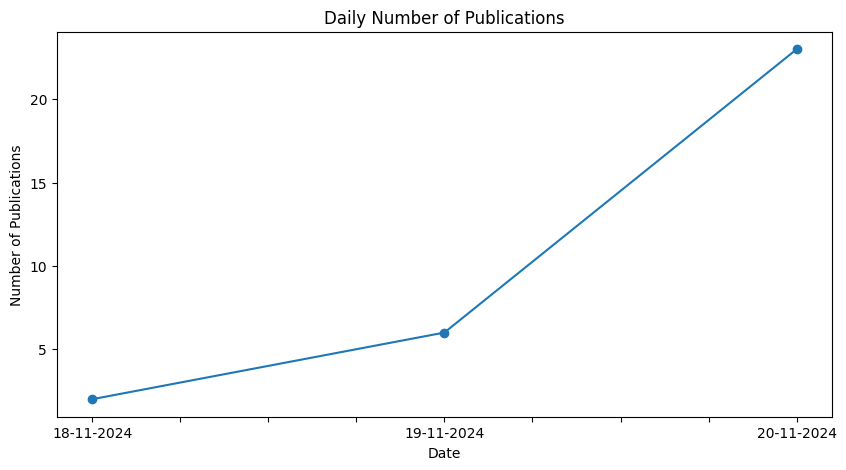

In [17]:
# Creating a line plot of the daily amount of publications
date_counts.sort_index().plot(kind='line', marker='o', figsize=(10, 5))
plt.title("Daily Number of Publications")
plt.xlabel("Date")
plt.ylabel("Number of Publications")
plt.show()

## 5. Importing the Analyzed Data to a new Excel File

In [18]:
# Altering the Published At column back to datetime format (it was previously converted to string)
df['Published At'] = pd.to_datetime(df['Published At'], errors='coerce', dayfirst=True)

# Deleting the time zone from the Published At column
df['Published At'] = df['Published At'].dt.tz_localize(None)

# Formatting the date to DD-MM-YYYY
df['Published At'] = df['Published At'].dt.strftime('%d-%m-%Y')

# Saving the updated dataframe to an Excel file
output_file = 'analyzed_headlines.xlsx'
df.to_excel(output_file, index=False, engine='openpyxl')

print(f"Updated DataFrame saved to the file '{output_file}'!")

Updated DataFrame saved to the file 'analyzed_headlines.xlsx'!
